In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
print(df.shape)
print(df.info())
print(df.describe())

(730, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None
          instant      season          yr        mnth     holiday     weekday 

### There are no NA values in the dataset

In [4]:
#Removing the unwanted column Instant
df.drop("instant", axis=1, inplace=True)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')
df['day'] = df['dteday'].dt.day
df.drop("dteday", axis=1, inplace=True)

In [6]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


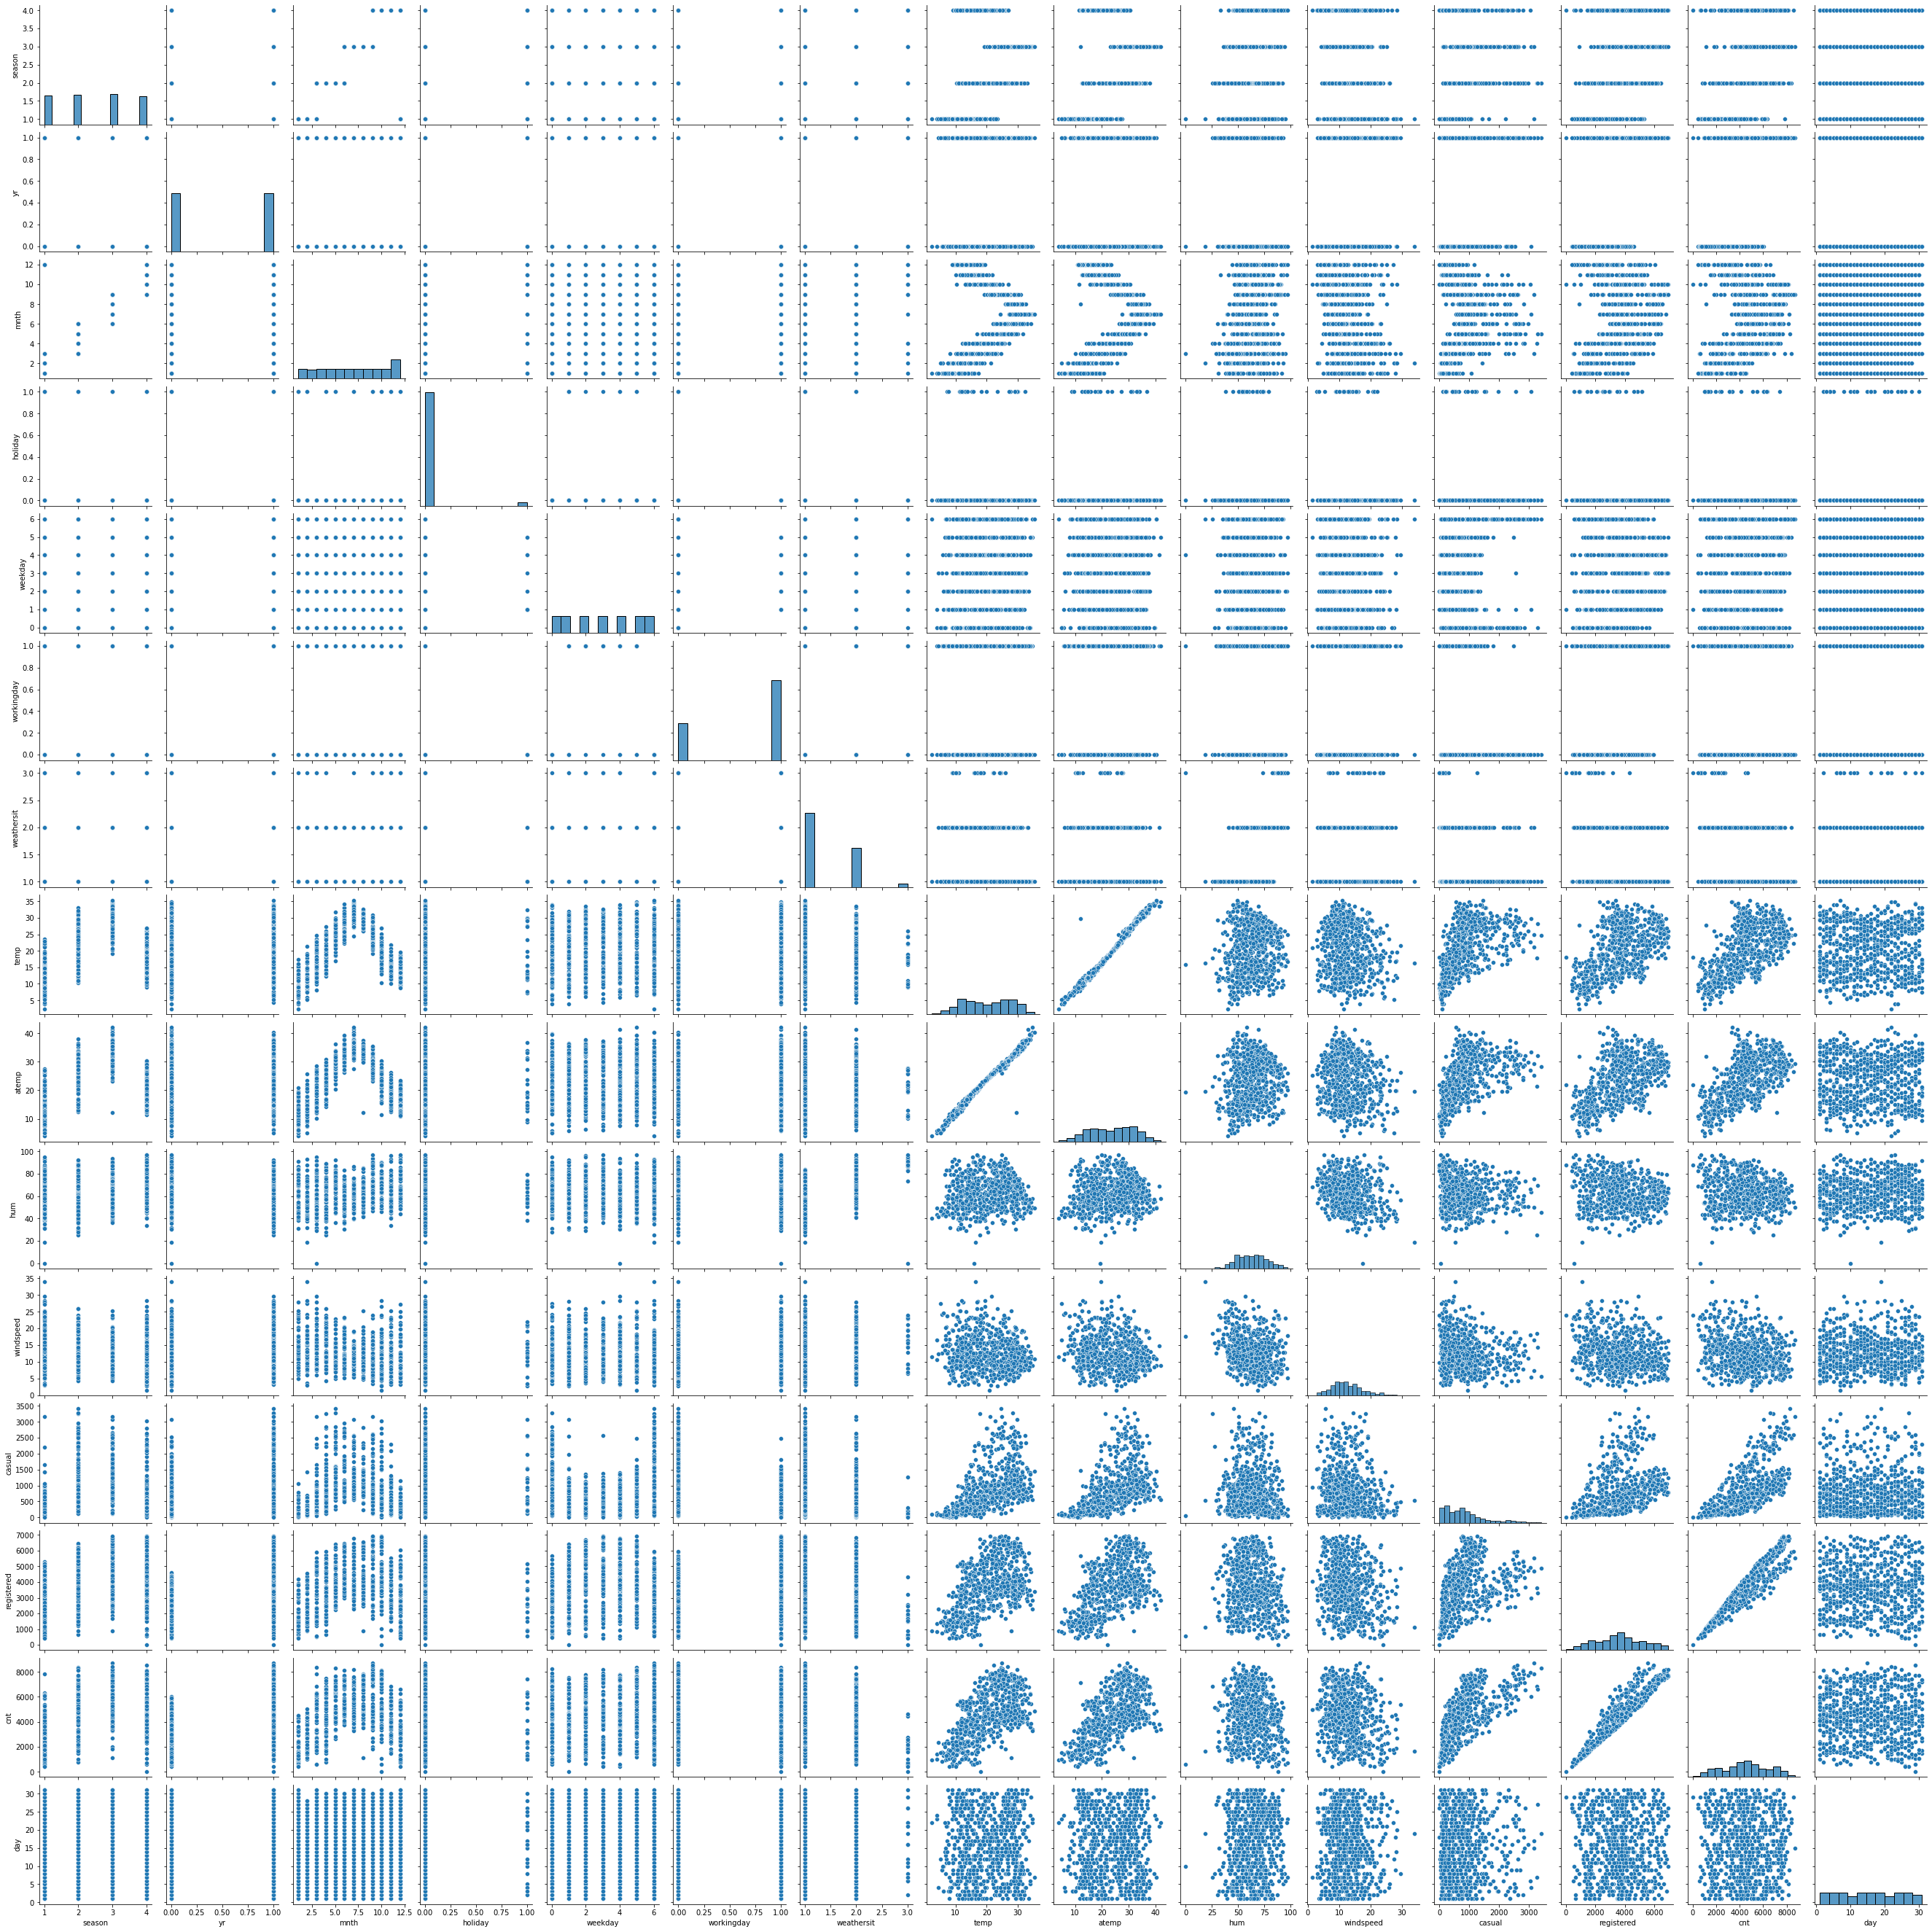

In [7]:

sns.pairplot(df)
plt.show()

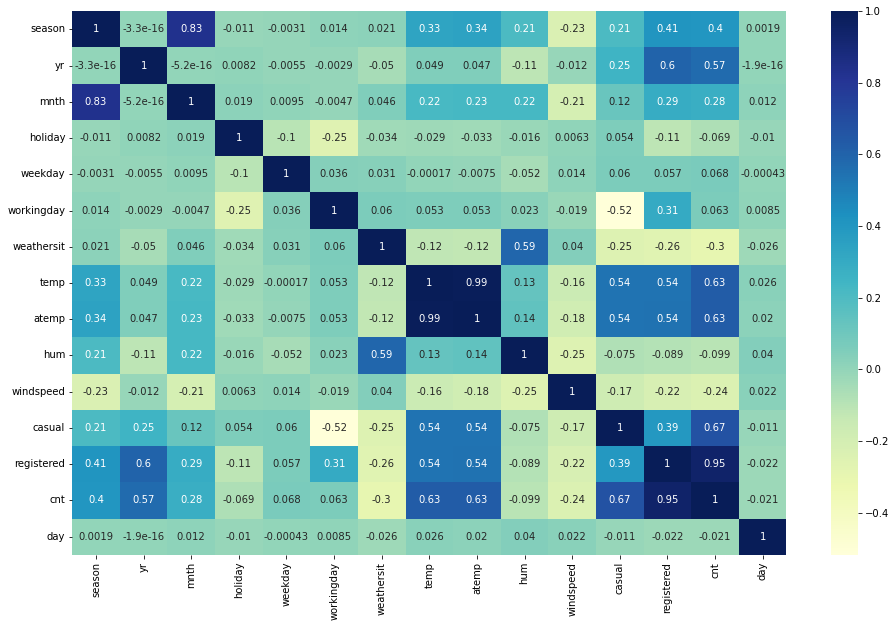

In [8]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

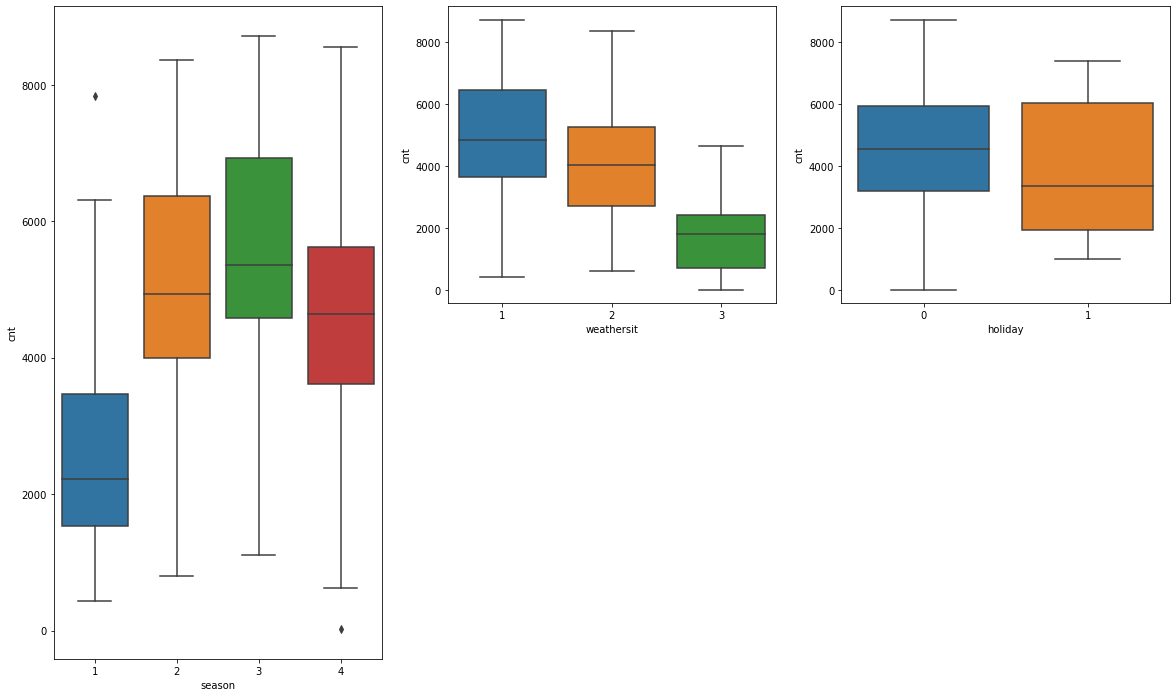

In [9]:
plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)

In [10]:
#Converting seasons to
#1 -> 100
#2 -> 010
#3 -> 001
#4 -> 000
status = pd.get_dummies(df['season'], drop_first = True)
status.rename(columns = {2:'summer', 3:'fall', 4:'winter'}, inplace = True)
#status.head()
df = pd.concat([df,status],axis = 1)

In [11]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,summer,fall,winter
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5,0,0,0


In [12]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.reshape:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'Dtype | None' = None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : str, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix`.
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
  

In [13]:
#Converting weathersit to
#1 -> 100
#2 -> 010
#3 -> 001
#4 -> 000
status = pd.get_dummies(df['weathersit'])
status.rename(columns = {1:'clear',2:'mist', 3:'light_snow', 4:'heavy_rain'}, inplace = True)
#status.head()
df = pd.concat([df,status],axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,casual,registered,cnt,day,summer,fall,winter,clear,mist,light_snow
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,331,654,985,1,0,0,0,0,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,131,670,801,2,0,0,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,120,1229,1349,3,0,0,0,1,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,108,1454,1562,4,0,0,0,1,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,82,1518,1600,5,0,0,0,1,0,0


In [14]:
#dropping weathersit and season column
df.drop(['weathersit','season'], axis = 1, inplace = True)

In [15]:
values = ['mnth','holiday','weekday','workingday','temp','atemp','hum','windspeed','casual','registered','cnt','day']

In [16]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [17]:
scaler = MinMaxScaler()
df_train[values] = scaler.fit_transform(df_train[values])

C:\Users\nikhi\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [18]:
df_train.head()
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,day,summer,fall,winter,clear,mist,light_snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000
mean,0.507843,0.504456,0.025490,0.498366,0.676471,0.537262,0.512989,0.650369,0.320768,0.254661,0.523944,0.513620,0.487124,0.245098,0.262745,0.24902,0.627451,0.343137,0.029412
std,0.500429,0.315338,0.157763,0.336182,0.468282,0.225844,0.212385,0.145882,0.169797,0.206011,0.228175,0.224593,0.296648,0.430568,0.440557,0.43287,0.483958,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,0.233333,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.540519,0.526811,0.653714,0.296763,0.212740,0.525123,0.518638,0.500000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,0.733333,0.000000,1.000000,0.00000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


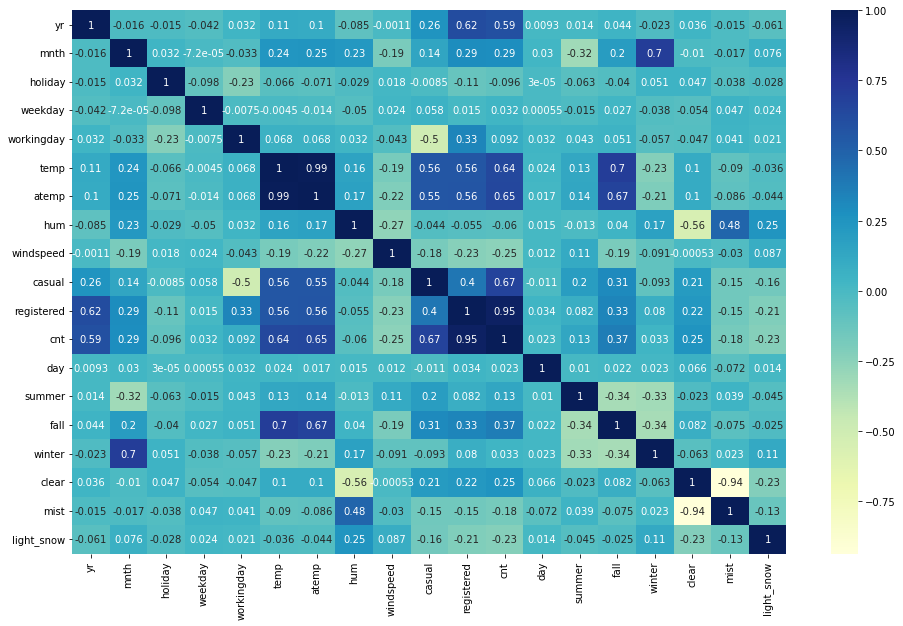

In [19]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

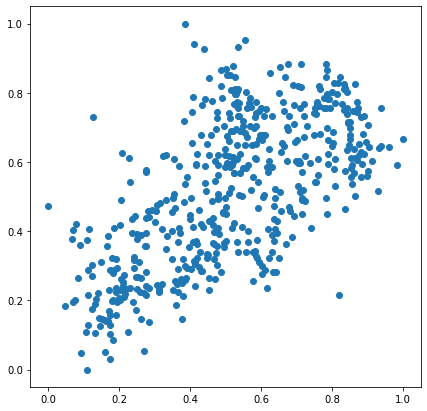

In [20]:
#atemp and temp are highly corelated with cnt, but atemp and temp being similar, takining atemp first
plt.figure(figsize = [7,7])
plt.scatter(df_train.cnt, df_train.atemp)

In [21]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
x_train = df_train
x_train.drop(['casual','registered'], axis = 1, inplace = True)

C:\Users\nikhi\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
#Building a linear model
x_train_lm = sm.add_constant(x_train[['atemp']])
x_train_lm

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,atemp
653,1.0,0.501133
576,1.0,0.766351
426,1.0,0.438975
728,1.0,0.200348
482,1.0,0.391735
...,...,...
526,1.0,0.762183
578,1.0,0.824359
53,1.0,0.218747
350,1.0,0.223544


In [23]:
# Create a first fitted model
lr = sm.OLS(y_train, x_train_lm).fit()

In [24]:
lr.params

const    0.162924
atemp    0.683633
dtype: float64

In [25]:
#x_train_lm.iloc[:,1].shape
#y_train.shape

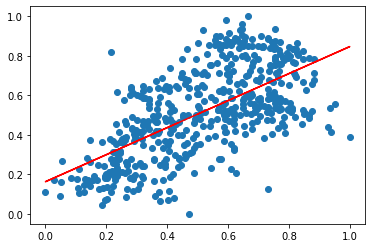

In [26]:
plt.scatter(x_train_lm.iloc[:,1], y_train)
plt.plot(x_train_lm.iloc[:,1], 0.162924 + 0.683633*x_train_lm.iloc[:,1], 'r')
plt.show()

In [27]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           1.10e-61
Time:                        10:14:01   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.000       0.124       0.202
atemp          0.6836      0.036     19.098      0.000       0.613       0.754
==============================================================================
Omnibus:                        3.316   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.842
Skew:                           0.090   Prob(JB):                        0.241
Kurtosis:                       2.682   Cond. No.                         6.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#adding second most corelated variable temp
x_train_lm = sm.add_constant(x_train[['atemp','temp']])
lr = sm.OLS(y_train, x_train_lm).fit()
lr.params

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const    0.163383
atemp    0.492316
temp     0.181818
dtype: float64

In [29]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           1.95e-60
Time:                        10:14:01   Log-Likelihood:                 176.81
No. Observations:                 510   AIC:                            -347.6
Df Residuals:                     507   BIC:                            -334.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1634      0.020      8.215      0.000       0.124       0.202
atemp          0.4923      0.248      1.984      0.048       0.005       0.980
temp           0.1818      0.233      0.779      0.436      -0.277       0.640
==============================================================================
Omnibus:                        4.934   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                3.720
Skew:                           0.079   Prob(JB):                        0.156
Kurtosis:                       2.612   Cond. No.                         56.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#there was no significant difference after adding temp and the P value is also high, so we can remove it
# adding next variable summer fall winter
x_train_lm = sm.add_constant(x_train[['atemp','summer','fall','winter']])
lr = sm.OLS(y_train, x_train_lm).fit()
lr.params

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const     0.118581
atemp     0.625120
summer    0.095646
fall      0.065170
winter    0.135703
dtype: float64

In [31]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     108.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           8.39e-67
Time:                        10:14:01   Log-Likelihood:                 196.98
No. Observations:                 510   AIC:                            -384.0
Df Residuals:                     505   BIC:                            -362.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1186      0.022      5.284      0.000       0.074       0.163
atemp          0.6251      0.059     10.559      0.000       0.509       0.741
summer         0.0956      0.027      3.585      0.000       0.043       0.148
fall           0.0652      0.034      1.891      0.059      -0.003       0.133
winter         0.1357      0.023      5.980      0.000       0.091       0.180
==============================================================================
Omnibus:                        0.897   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.639   Jarque-Bera (JB):                0.952
Skew:                          -0.022   Prob(JB):                        0.621
Kurtosis:                       2.793   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# adding next variable summer fall winter
x_train_lm = sm.add_constant(x_train[['atemp','summer','fall','winter','clear','mist','light_snow']])
lr = sm.OLS(y_train, x_train_lm).fit()
lr.params

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const         0.022537
atemp         0.580708
summer        0.109627
fall          0.082466
winter        0.158155
clear         0.141101
mist          0.064446
light_snow   -0.183010
dtype: float64

In [33]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     97.26
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           6.97e-81
Time:                        10:14:01   Log-Likelihood:                 234.91
No. Observations:                 510   AIC:                            -455.8
Df Residuals:                     503   BIC:                            -426.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0225      0.018      1.246      0.213      -0.013       0.058
atemp          0.5807      0.055     10.496      0.000       0.472       0.689
summer         0.1096      0.025      4.406      0.000       0.061       0.159
fall           0.0825      0.032      2.568      0.011       0.019       0.146
winter         0.1582      0.021      7.438      0.000       0.116       0.200
clear          0.1411      0.013     10.463      0.000       0.115       0.168
mist           0.0644      0.014      4.551      0.000       0.037       0.092
light_snow    -0.1830      0.031     -5.987      0.000      -0.243      -0.123
==============================================================================
Omnibus:                        6.859   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                5.102
Skew:                           0.125   Prob(JB):                       0.0780
Kurtosis:                       2.579   Cond. No.                     8.33e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.47e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
x_train_lm = sm.add_constant(x_train[['atemp','summer','fall','winter','clear','mist','light_snow','mnth']])
lr = sm.OLS(y_train, x_train_lm).fit()
lr.params

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const         0.026219
atemp         0.583245
summer        0.113829
fall          0.095637
winter        0.181160
clear         0.142530
mist          0.065859
light_snow   -0.182169
mnth         -0.032925
dtype: float64

In [35]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     83.39
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           5.33e-80
Time:                        10:14:01   Log-Likelihood:                 235.22
No. Observations:                 510   AIC:                            -454.4
Df Residuals:                     502   BIC:                            -420.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0262      0.019      1.402      0.162      -0.011       0.063
atemp          0.5832      0.055     10.519      0.000       0.474       0.692
summer         0.1138      0.025      4.469      0.000       0.064       0.164
fall           0.0956      0.036      2.633      0.009       0.024       0.167
winter         0.1812      0.036      4.970      0.000       0.110       0.253
clear          0.1425      0.014     10.468      0.000       0.116       0.169
mist           0.0659      0.014      4.611      0.000       0.038       0.094
light_snow    -0.1822      0.031     -5.954      0.000      -0.242      -0.122
mnth          -0.0329      0.042     -0.777      0.437      -0.116       0.050
==============================================================================
Omnibus:                        6.354   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.813
Skew:                           0.122   Prob(JB):                       0.0901
Kurtosis:                       2.591   Cond. No.                     4.84e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.96e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [36]:
# mnth have a very high P value, so we can remove mnth
m_values = ['atemp','summer','fall','winter','clear','mist','light_snow','holiday']
x_train_lm = sm.add_constant(x_train[m_values])
lr = sm.OLS(y_train, x_train_lm).fit()
lr.params

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const         0.025224
atemp         0.577593
summer        0.107456
fall          0.081423
winter        0.158718
clear         0.143723
mist          0.065569
light_snow   -0.184069
holiday      -0.095029
dtype: float64

In [37]:
#y_train_cnt = lr.predict(x_train_lm)
x_train_lm.shape

(510, 9)

In [38]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     84.69
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           6.66e-81
Time:                        10:14:01   Log-Likelihood:                 237.35
No. Observations:                 510   AIC:                            -458.7
Df Residuals:                     502   BIC:                            -424.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0252      0.018      1.397      0.163      -0.010       0.061
atemp          0.5776      0.055     10.476      0.000       0.469       0.686
summer         0.1075      0.025      4.332      0.000       0.059       0.156
fall           0.0814      0.032      2.545      0.011       0.019       0.144
winter         0.1587      0.021      7.492      0.000       0.117       0.200
clear          0.1437      0.013     10.656      0.000       0.117       0.170
mist           0.0656      0.014      4.645      0.000       0.038       0.093
light_snow    -0.1841      0.030     -6.044      0.000      -0.244      -0.124
holiday       -0.0950      0.043     -2.195      0.029      -0.180      -0.010
==============================================================================
Omnibus:                        8.087   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                5.696
Skew:                           0.125   Prob(JB):                       0.0579
Kurtosis:                       2.547   Cond. No.                     4.52e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.01e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
#checking VIF
vif = pd.DataFrame()
vif['Features'] = x_train[m_values].columns
vif['VIF'] = [variance_inflation_factor(x_train[m_values].values, i) for i in range(x_train[m_values].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,clear,6.59
2,fall,4.31
5,mist,3.74
0,atemp,2.98
1,summer,2.48
3,winter,1.83
6,light_snow,1.25
7,holiday,1.01


In [40]:
# adding all the variables to the model
x_train_lr2 = sm.add_constant(x_train)
lr2 = sm.OLS(y_train, x_train_lr2).fit()
lr2.params

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const         0.052904
yr            0.232227
mnth          0.012291
holiday      -0.064052
weekday       0.048640
workingday    0.019012
temp          0.438634
atemp         0.056174
hum          -0.124481
windspeed    -0.177625
day          -0.008180
summer        0.116338
fall          0.070838
winter        0.156211
clear         0.120016
mist          0.061193
light_snow   -0.128306
dtype: float64

In [41]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     165.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.93e-181
Time:                        10:14:01   Log-Likelihood:                 496.17
No. Observations:                 510   AIC:                            -960.3
Df Residuals:                     494   BIC:                            -892.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0529      0.026      1.998      0.046       0.001       0.105
yr             0.2322      0.008     27.695      0.000       0.216       0.249
mnth           0.0123      0.026      0.476      0.634      -0.038       0.063
holiday       -0.0641      0.027     -2.360      0.019      -0.117      -0.011
weekday        0.0486      0.012      3.903      0.000       0.024       0.073
workingday     0.0190      0.009      2.089      0.037       0.001       0.037
temp           0.4386      0.139      3.155      0.002       0.166       0.712
atemp          0.0562      0.142      0.395      0.693      -0.223       0.335
hum           -0.1245      0.039     -3.184      0.002      -0.201      -0.048
windspeed     -0.1776      0.027     -6.566      0.000      -0.231      -0.124
day           -0.0082      0.014     -0.584      0.560      -0.036       0.019
summer         0.1163      0.016      7.443      0.000       0.086       0.147
fall           0.0708      0.023      3.066      0.002       0.025       0.116
winter         0.1562      0.022      7.047      0.000       0.113       0.200
clear          0.1200      0.009     13.240      0.000       0.102       0.138
mist           0.0612      0.012      5.124      0.000       0.038       0.085
light_snow    -0.1283      0.023     -5.628      0.000      -0.173      -0.084
==============================================================================
Omnibus:                       71.668   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.609
Skew:                          -0.712   Prob(JB):                     2.22e-40
Kurtosis:                       5.562   Cond. No.                     7.30e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.15e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
#checking VIF
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,58.09
6,atemp,53.71
13,clear,33.65
14,mist,24.93
11,fall,6.11
12,winter,5.43
1,mnth,3.91
15,light_snow,3.67
10,summer,2.67
7,hum,1.92


In [43]:
#removing mnth and windspeed as it has very high P value
#removing temp as it has high P value and VIF aswell
X = x_train.drop(['mnth','temp'], 1)


C:\Users\nikhi\AppData\Local\Temp/ipykernel_9896/2370274027.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = x_train.drop(['mnth','temp'], 1)


In [44]:
#building the model again
x_train_lr2 = sm.add_constant(X)

lr_2 = sm.OLS(y_train, x_train_lr2).fit()
lr_2.summary()

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.57e-181
Time:                        10:14:01   Log-Likelihood:                 490.96
No. Observations:                 510   AIC:                            -953.9
Df Residuals:                     496   BIC:                            -894.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0513      0.027      1.922      0.055      -0.001       0.104
yr             0.2334      0.008     27.664      0.000       0.217       0.250
holiday       -0.0602      0.027     -2.204      0.028      -0.114      -0.007
weekday        0.0510      0.013      4.074      0.000       0.026       0.076
workingday     0.0192      0.009      2.089      0.037       0.001       0.037
atemp          0.4916      0.035     13.958      0.000       0.422       0.561
hum           -0.1210      0.039     -3.084      0.002      -0.198      -0.044
windspeed     -0.1611      0.027     -6.018      0.000      -0.214      -0.109
day           -0.0065      0.014     -0.461      0.645      -0.034       0.021
summer         0.1245      0.015      8.167      0.000       0.095       0.154
fall           0.0959      0.020      4.847      0.000       0.057       0.135
winter         0.1658      0.013     12.606      0.000       0.140       0.192
clear          0.1191      0.009     13.136      0.000       0.101       0.137
mist           0.0592      0.012      4.927      0.000       0.036       0.083
light_snow    -0.1271      0.023     -5.531      0.000      -0.172      -0.082
==============================================================================
Omnibus:                       73.594   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.751
Skew:                          -0.717   Prob(JB):                     3.11e-43
Kurtosis:                       5.675   Cond. No.                     2.10e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.38e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
#Calculating VIF again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,clear,33.47
12,mist,24.86
9,fall,4.40
13,light_snow,3.67
4,atemp,3.24
8,summer,2.50
5,hum,1.90
10,winter,1.88
6,windspeed,1.20
1,holiday,1.08


In [46]:
#drpopping light_snow, day, summer as it has high P value
X = X.drop(['day'], 1)
x_train_lr2 = sm.add_constant(X)

lr_2 = sm.OLS(y_train, x_train_lr2).fit()
lr_2.summary()

C:\Users\nikhi\AppData\Local\Temp/ipykernel_9896/1390325551.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = X.drop(['day'], 1)
C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.7
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.20e-182
Time:                        10:14:01   Log-Likelihood:                 490.85
No. Observations:                 510   AIC:                            -955.7
Df Residuals:                     497   BIC:                            -900.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0498      0.026      1.881      0.061      -0.002       0.102
yr             0.2333      0.008     27.682      0.000       0.217       0.250
holiday       -0.0603      0.027     -2.209      0.028      -0.114      -0.007
weekday        0.0510      0.013      4.072      0.000       0.026       0.076
workingday     0.0190      0.009      2.075      0.038       0.001       0.037
atemp          0.4924      0.035     14.010      0.000       0.423       0.561
hum           -0.1222      0.039     -3.125      0.002      -0.199      -0.045
windspeed     -0.1616      0.027     -6.044      0.000      -0.214      -0.109
summer         0.1241      0.015      8.160      0.000       0.094       0.154
fall           0.0953      0.020      4.832      0.000       0.057       0.134
winter         0.1655      0.013     12.610      0.000       0.140       0.191
clear          0.1183      0.009     13.304      0.000       0.101       0.136
mist           0.0589      0.012      4.913      0.000       0.035       0.082
light_snow    -0.1275      0.023     -5.558      0.000      -0.173      -0.082
==============================================================================
Omnibus:                       75.264   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.821
Skew:                          -0.731   Prob(JB):                     2.47e-44
Kurtosis:                       5.704   Cond. No.                     1.85e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.24e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [47]:
#Calculating VIF again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,clear,32.55
11,mist,24.55
8,fall,4.38
12,light_snow,3.64
4,atemp,3.24
7,summer,2.49
5,hum,1.89
9,winter,1.87
6,windspeed,1.20
1,holiday,1.08


In [48]:
X = X.drop(['clear'], 1)
x_train_lr2 = sm.add_constant(X)

lr_2 = sm.OLS(y_train, x_train_lr2).fit()
lr_2.summary()

C:\Users\nikhi\AppData\Local\Temp/ipykernel_9896/4045554740.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = X.drop(['clear'], 1)
C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.7
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.20e-182
Time:                        10:14:01   Log-Likelihood:                 490.85
No. Observations:                 510   AIC:                            -955.7
Df Residuals:                     497   BIC:                            -900.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1681      0.030      5.629      0.000       0.109       0.227
yr             0.2333      0.008     27.682      0.000       0.217       0.250
holiday       -0.0603      0.027     -2.209      0.028      -0.114      -0.007
weekday        0.0510      0.013      4.072      0.000       0.026       0.076
workingday     0.0190      0.009      2.075      0.038       0.001       0.037
atemp          0.4924      0.035     14.010      0.000       0.423       0.561
hum           -0.1222      0.039     -3.125      0.002      -0.199      -0.045
windspeed     -0.1616      0.027     -6.044      0.000      -0.214      -0.109
summer         0.1241      0.015      8.160      0.000       0.094       0.154
fall           0.0953      0.020      4.832      0.000       0.057       0.134
winter         0.1655      0.013     12.610      0.000       0.140       0.191
mist          -0.0594      0.011     -5.421      0.000      -0.081      -0.038
light_snow    -0.2458      0.027     -8.956      0.000      -0.300      -0.192
==============================================================================
Omnibus:                       75.264   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.821
Skew:                          -0.731   Prob(JB):                     2.47e-44
Kurtosis:                       5.704   Cond. No.                         21.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,atemp,21.54
5,hum,17.13
8,fall,5.93
6,windspeed,3.78
7,summer,3.30
3,workingday,3.14
2,weekday,3.01
9,winter,2.49
10,mist,2.13
0,yr,2.03


In [50]:
X = X.drop(['hum','fall'], 1)
x_train_lr2 = sm.add_constant(X)

lr_2 = sm.OLS(y_train, x_train_lr2).fit()
lr_2.summary()

C:\Users\nikhi\AppData\Local\Temp/ipykernel_9896/331399013.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = X.drop(['hum','fall'], 1)
C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     224.1
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.13e-177
Time:                        10:14:01   Log-Likelihood:                 472.82
No. Observations:                 510   AIC:                            -923.6
Df Residuals:                     499   BIC:                            -877.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0792      0.020      3.965      0.000       0.040       0.118
yr             0.2342      0.009     27.074      0.000       0.217       0.251
holiday       -0.0620      0.028     -2.195      0.029      -0.117      -0.006
weekday        0.0561      0.013      4.357      0.000       0.031       0.081
workingday     0.0199      0.009      2.098      0.036       0.001       0.038
atemp          0.6046      0.022     27.915      0.000       0.562       0.647
windspeed     -0.1456      0.026     -5.500      0.000      -0.198      -0.094
summer         0.0690      0.011      6.460      0.000       0.048       0.090
winter         0.1212      0.011     11.207      0.000       0.100       0.142
mist          -0.0781      0.009     -8.500      0.000      -0.096      -0.060
light_snow    -0.2732      0.026    -10.519      0.000      -0.324      -0.222
==============================================================================
Omnibus:                       58.001   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.598
Skew:                          -0.575   Prob(JB):                     3.27e-33
Kurtosis:                       5.391   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,atemp,4.41
5,windspeed,3.41
3,workingday,2.95
2,weekday,2.88
0,yr,2.01
8,mist,1.52
6,summer,1.51
7,winter,1.40
9,light_snow,1.08
1,holiday,1.07


In [52]:
X = X.drop(['workingday'], 1)
x_train_lr2 = sm.add_constant(X)

lr_2 = sm.OLS(y_train, x_train_lr2).fit()
lr_2.summary()

C:\Users\nikhi\AppData\Local\Temp/ipykernel_9896/4212755588.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = X.drop(['workingday'], 1)
C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     246.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.17e-177
Time:                        10:14:01   Log-Likelihood:                 470.58
No. Observations:                 510   AIC:                            -921.2
Df Residuals:                     500   BIC:                            -878.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0929      0.019      4.906      0.000       0.056       0.130
yr             0.2346      0.009     27.044      0.000       0.218       0.252
holiday       -0.0754      0.028     -2.733      0.006      -0.130      -0.021
weekday        0.0552      0.013      4.277      0.000       0.030       0.081
atemp          0.6061      0.022     27.905      0.000       0.563       0.649
windspeed     -0.1477      0.027     -5.563      0.000      -0.200      -0.096
summer         0.0693      0.011      6.466      0.000       0.048       0.090
winter         0.1203      0.011     11.094      0.000       0.099       0.142
mist          -0.0774      0.009     -8.393      0.000      -0.095      -0.059
light_snow    -0.2714      0.026    -10.421      0.000      -0.323      -0.220
==============================================================================
Omnibus:                       61.878   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.916
Skew:                          -0.625   Prob(JB):                     3.78e-34
Kurtosis:                       5.383   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,3.86
4,windspeed,3.29
2,weekday,2.85
0,yr,2.00
5,summer,1.51
7,mist,1.50
6,winter,1.39
8,light_snow,1.08
1,holiday,1.04


In [54]:
#  Trying building a model using RFE method
lm = LinearRegression()
lm.fit(x_train, y_train)

# Running RFE with the output number of the variable equal to 8
rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(x_train, y_train)

C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [55]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 6),
 ('holiday', True, 1),
 ('weekday', False, 3),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('day', False, 7),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('clear', True, 1),
 ('mist', False, 4),
 ('light_snow', True, 1)]

In [56]:
col = x_train.columns[rfe.support_]
type(col)

pandas.core.indexes.base.Index

In [57]:
x_train.columns[~rfe.support_]

Index(['mnth', 'weekday', 'workingday', 'atemp', 'day', 'mist'], dtype='object')

In [58]:
X_train_rfe = x_train[col]
x_train_rfe = sm.add_constant(X_train_rfe)

lr_3 = sm.OLS(y_train, x_train_rfe).fit()
lr_3.summary()

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          4.78e-183
Time:                        10:14:02   Log-Likelihood:                 486.16
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     499   BIC:                            -903.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1641      0.033      4.945      0.000       0.099       0.229
yr             0.2307      0.008     27.186      0.000       0.214       0.247
holiday       -0.0865      0.027     -3.245      0.001      -0.139      -0.034
temp           0.4961      0.035     14.324      0.000       0.428       0.564
hum           -0.1390      0.039     -3.548      0.000      -0.216      -0.062
windspeed     -0.1827      0.027     -6.794      0.000      -0.236      -0.130
summer         0.1168      0.015      7.554      0.000       0.086       0.147
fall           0.0746      0.021      3.597      0.000       0.034       0.115
winter         0.1630      0.013     12.350      0.000       0.137       0.189
clear          0.0537      0.011      4.889      0.000       0.032       0.075
light_snow    -0.1872      0.026     -7.171      0.000      -0.239      -0.136
==============================================================================
Omnibus:                       64.105   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.041
Skew:                          -0.644   Prob(JB):                     1.07e-35
Kurtosis:                       5.433   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,23.22
3,hum,10.62
6,fall,6.49
4,windspeed,3.90
5,summer,3.36
8,clear,2.76
7,winter,2.49
0,yr,2.03
9,light_snow,1.13
1,holiday,1.04


In [60]:
X_train_rfe=X_train_rfe.drop(['fall','hum'], axis = 1)
x_train_rfe = sm.add_constant(X_train_rfe)
lr_3 = sm.OLS(y_train, x_train_rfe).fit()
lr_3.summary()

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     280.1
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.72e-179
Time:                        10:14:02   Log-Likelihood:                 471.98
No. Observations:                 510   AIC:                            -926.0
Df Residuals:                     501   BIC:                            -887.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0506      0.017      2.903      0.004       0.016       0.085
yr             0.2320      0.009     26.855      0.000       0.215       0.249
holiday       -0.0898      0.027     -3.285      0.001      -0.144      -0.036
temp           0.5752      0.020     28.339      0.000       0.535       0.615
windspeed     -0.1639      0.026     -6.239      0.000      -0.216      -0.112
summer         0.0739      0.011      6.939      0.000       0.053       0.095
winter         0.1273      0.011     11.727      0.000       0.106       0.149
clear          0.0751      0.009      8.185      0.000       0.057       0.093
light_snow    -0.1998      0.026     -7.574      0.000      -0.252      -0.148
==============================================================================
Omnibus:                       51.763   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.606
Skew:                          -0.545   Prob(JB):                     6.47e-27
Kurtosis:                       5.119   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.92
3,windspeed,3.16
6,clear,2.67
0,yr,2.00
4,summer,1.49
5,winter,1.35
7,light_snow,1.11
1,holiday,1.04


## Checking all the models created and selecting the best one

In [62]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     84.69
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           6.66e-81
Time:                        10:14:02   Log-Likelihood:                 237.35
No. Observations:                 510   AIC:                            -458.7
Df Residuals:                     502   BIC:                            -424.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0252      0.018      1.397      0.163      -0.010       0.061
atemp          0.5776      0.055     10.476      0.000       0.469       0.686
summer         0.1075      0.025      4.332      0.000       0.059       0.156
fall           0.0814      0.032      2.545      0.011       0.019       0.144
winter         0.1587      0.021      7.492      0.000       0.117       0.200
clear          0.1437      0.013     10.656      0.000       0.117       0.170
mist           0.0656      0.014      4.645      0.000       0.038       0.093
light_snow    -0.1841      0.030     -6.044      0.000      -0.244      -0.124
holiday       -0.0950      0.043     -2.195      0.029      -0.180      -0.010
==============================================================================
Omnibus:                        8.087   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                5.696
Skew:                           0.125   Prob(JB):                       0.0579
Kurtosis:                       2.547   Cond. No.                     4.52e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.01e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

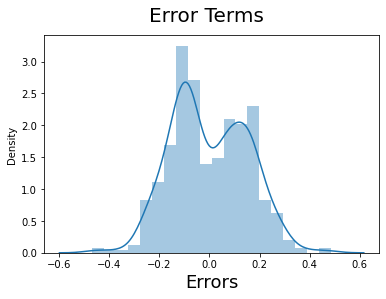

In [63]:
y_train_cnt = lr.predict(x_train_lm)
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [64]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     246.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.17e-177
Time:                        10:14:02   Log-Likelihood:                 470.58
No. Observations:                 510   AIC:                            -921.2
Df Residuals:                     500   BIC:                            -878.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0929      0.019      4.906      0.000       0.056       0.130
yr             0.2346      0.009     27.044      0.000       0.218       0.252
holiday       -0.0754      0.028     -2.733      0.006      -0.130      -0.021
weekday        0.0552      0.013      4.277      0.000       0.030       0.081
atemp          0.6061      0.022     27.905      0.000       0.563       0.649
windspeed     -0.1477      0.027     -5.563      0.000      -0.200      -0.096
summer         0.0693      0.011      6.466      0.000       0.048       0.090
winter         0.1203      0.011     11.094      0.000       0.099       0.142
mist          -0.0774      0.009     -8.393      0.000      -0.095      -0.059
light_snow    -0.2714      0.026    -10.421      0.000      -0.323      -0.220
==============================================================================
Omnibus:                       61.878   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.916
Skew:                          -0.625   Prob(JB):                     3.78e-34
Kurtosis:                       5.383   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

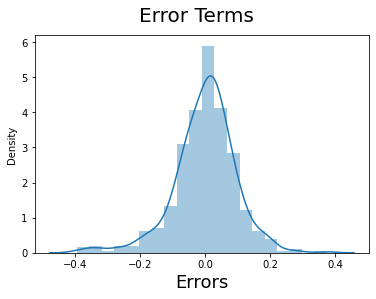

In [65]:
y_train_cnt = lr_2.predict(x_train_lr2)
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [66]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     280.1
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.72e-179
Time:                        10:14:02   Log-Likelihood:                 471.98
No. Observations:                 510   AIC:                            -926.0
Df Residuals:                     501   BIC:                            -887.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0506      0.017      2.903      0.004       0.016       0.085
yr             0.2320      0.009     26.855      0.000       0.215       0.249
holiday       -0.0898      0.027     -3.285      0.001      -0.144      -0.036
temp           0.5752      0.020     28.339      0.000       0.535       0.615
windspeed     -0.1639      0.026     -6.239      0.000      -0.216      -0.112
summer         0.0739      0.011      6.939      0.000       0.053       0.095
winter         0.1273      0.011     11.727      0.000       0.106       0.149
clear          0.0751      0.009      8.185      0.000       0.057       0.093
light_snow    -0.1998      0.026     -7.574      0.000      -0.252      -0.148
==============================================================================
Omnibus:                       51.763   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.606
Skew:                          -0.545   Prob(JB):                     6.47e-27
Kurtosis:                       5.119   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

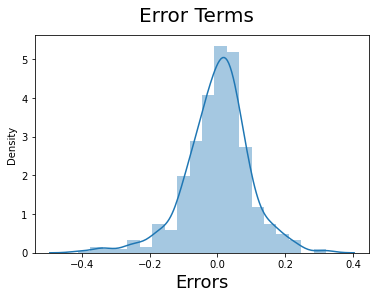

In [67]:
y_train_cnt = lr_3.predict(x_train_rfe)
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

## Selecting the 2nd module as it has the similar R squared adjusted value as 3rd and the normal error graph is much cleaner and nomal

## Making Predictions

In [68]:
df_test[values] = scaler.transform(df_test[values])

C:\Users\nikhi\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [69]:
y_test = df_test.pop('cnt')
X_test = df_test

In [78]:
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [80]:
y_pred = lr_2.predict(X_test_new)
#X_test_new2.shape

Text(0, 0.5, 'y_pred')

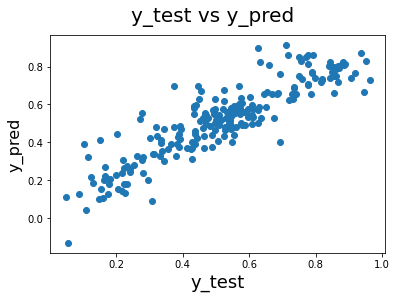

In [82]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [83]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7907063211427016